# Importing libraries and appending paths 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
import plotly.graph_objects as go

In [2]:
sys.path.append('..')

# Importing serotype data

In [3]:
file_s = '../Data/dengue_BR_serotypes.csv'
s_data = pd.read_csv(file_s, delimiter = ';')

In [4]:
s_data_grouped = s_data.groupby(['YEAR','SOROTIPO','UF_NAME'])['NUMBER'].sum()
s_data_grouped = s_data_grouped.to_frame(name = 'CASES').reset_index()

In [5]:
s_data = s_data_grouped.copy()

## Pre-processing and padding
- Basically padding for all 0 values that are in this dataframe, so that we have information for all states for all serotypes and for all years

In [6]:
years = s_data['YEAR'].unique()
states = s_data['UF_NAME'].unique()
serotypes = s_data['SOROTIPO'].unique()

In [7]:
s_data

,YEAR,SOROTIPO,UF_NAME,CASES
0,2007,,AC,507
1,2007,,AL,9343
2,2007,,AM,1497
3,2007,,AP,3460
4,2007,,BA,5975
...,...,...,...,...
1422,2021,3,BA,2
1423,2021,3,PE,1
1424,2021,4,GO,5
1425,2021,4,MT,1


In [8]:
years_df = []
states_df = []
serotypes_df = []
cases_df = []

In [9]:
for year in years:
    for state in states:
        for serotype in serotypes:
            years_df.append(year)
            states_df.append(state)
            serotypes_df.append(serotype)
            filt_tmp = ((s_data['UF_NAME'] == state) & (s_data['YEAR'] == year) & (s_data['SOROTIPO'] == serotype))
            s_tmp = s_data[filt_tmp]
            if(s_tmp.empty):
                cases_df.append(0)
            else:
                cases_df.append(s_tmp.iloc[0]['CASES'])

In [10]:
df_total = pd.DataFrame(list(zip(years_df, states_df, serotypes_df, cases_df)),
                   columns =['YEAR', 'STATE', 'SEROTYPE', 'CASES'])

In [11]:
df_total

,YEAR,STATE,SEROTYPE,CASES
0,2007,AC,,507
1,2007,AC,1,0
2,2007,AC,2,1
3,2007,AC,3,1
4,2007,AC,4,1
...,...,...,...,...
2020,2021,TO,,7439
2021,2021,TO,1,324
2022,2021,TO,2,34
2023,2021,TO,3,0


# Interactive Result Plots

## Number of cases per state (total)

In [12]:
df_grouped = df_total.copy()
df_grouped = df_grouped.groupby(['YEAR','STATE'])['CASES'].sum()
df_grouped = df_grouped.to_frame(name = 'CASES').reset_index()

In [1]:
#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='plasma', n_colors=len(states)).as_hex())

fig = go.Figure()
for d,p in zip(states, pal):
    fig.add_trace(go.Scatter(x = df_grouped[df_grouped['STATE']==d]['YEAR'],
                             y = df_grouped[df_grouped['STATE']==d]['CASES'],
                             name = d,
                             line_color = p, 
                             line_width = 4,
                             marker_size = 8,
                             fill=None))   #tozeroy 
    fig.update_layout(width = 900, height = 700)

fig.show()

NameError: name 'sns' is not defined

### Visualizing the timeseries with pivot

In [14]:
df_states = df_grouped.pivot(index='YEAR', columns='STATE').droplevel(0, axis=1)
df_states

STATE,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
YEAR,,,,,,,,,,,,,,,,,,,,,
2007,510,9409,1550,3466,6038,30453,711,6156,12579,10970,...,25923,23820,6201,1791,611,380,119,862,100236,12224
2008,1726,8967,8633,1064,20130,52750,567,22657,35268,4609,...,1044,102784,13915,4158,3748,112,57,25465,8771,9609
2009,17535,2944,1411,1246,65815,6158,507,31305,30959,1663,...,975,3595,409,14297,3119,41,50,566,9567,3839
2010,34037,37836,6366,2377,29384,18887,12502,21439,74075,4722,...,34434,21140,3125,18384,6990,3498,178,554,194583,8756
2011,18705,7256,58383,2542,26847,57183,1810,34924,25889,9236,...,29086,132365,13972,1927,1318,319,131,2687,100600,10018
2012,2230,25501,3984,1385,32253,52202,841,10189,18731,3957,...,3699,66068,12937,2137,1799,121,83,4102,25526,10898
2013,2434,9612,15862,1631,40870,26278,15188,64586,89348,2691,...,59845,141449,10774,6398,870,454,289,577,209099,7955
2014,27488,9842,3260,855,7940,18883,13139,14052,67727,1608,...,19494,3498,4072,1494,831,72,62,1668,205083,3125
2015,5093,22169,2590,3151,21847,58737,9630,32030,105098,5345,...,42347,41453,5735,1865,978,1150,3675,7019,697701,6849


### Some basic statistics

In [15]:
df_stats_cases = pd.DataFrame()
df_stats_cases['MEAN'] = df_states.mean(axis = 0)
df_stats_cases['STD'] = df_states.std(axis = 0)
df_stats_cases['STD/MEAN'] = df_states.std(axis = 0)/df_states.mean(axis = 0)
df_stats_cases['MAX'] = df_states.max(axis = 0)
df_stats_cases['MIN'] = df_states.min(axis = 0)

In [31]:
df_stats_cases.sort_values(['MEAN'],ascending = [False])

,MEAN,STD,STD/MEAN,MAX,MIN
STATE,,,,,
SP,167123.666667,184127.446554,1.101744,697701,6434
MG,126400.933333,151790.568686,1.200866,426347,16104
GO,58110.666667,30501.705123,0.524890,108933,12579
RJ,41361.133333,47634.928489,1.151683,141449,2187
PR,38806.866667,58485.302401,1.507086,237055,836
CE,31037.800000,17937.370564,0.577920,58737,4016
BA,24880.800000,16699.069030,0.671163,65815,3596
ES,23743.000000,19594.290349,0.825266,64586,0
MS,20941.333333,20011.006327,0.955575,56368,648


## Number of serotype tests per state

That is, number of positive cases that were tested for serotype 1,2,3 or 4.

In [17]:
# total tests per state per year
df_res = df_total.copy()
filt_res = (df_res['SEROTYPE'] != ' ')
df_res = df_res[filt_res]
df_res = df_res.groupby(['YEAR','STATE'])['CASES'].sum()
df_res = df_res.to_frame(name = 'TESTS').reset_index()
df_tmp = df_total.copy()
df_tmp = df_tmp.groupby(['YEAR','STATE'])['CASES'].sum()
df_tmp = df_tmp.to_frame(name = 'CASES').reset_index()
df_res['CASES'] = df_tmp['CASES']
df_res['RATIO'] = df_res['TESTS']/df_res['CASES']

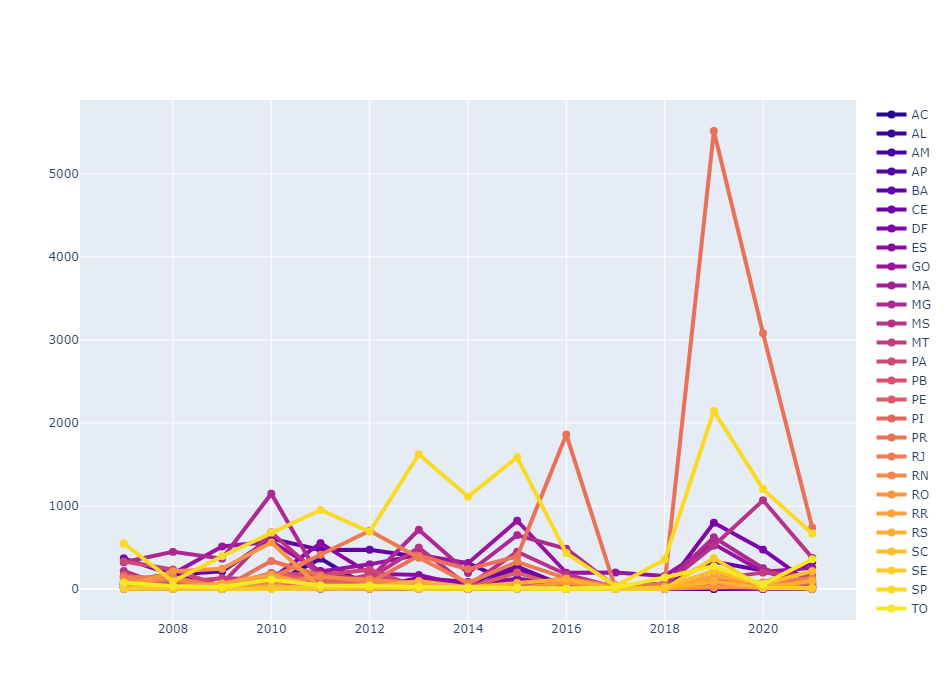

In [18]:
#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='plasma', n_colors=len(states)).as_hex())

fig = go.Figure()
for d,p in zip(states, pal):
    fig.add_trace(go.Scatter(x = df_res[df_res['STATE']==d]['YEAR'],
                             y = df_res[df_res['STATE']==d]['TESTS'],
                             name = d,
                             line_color = p, 
                             line_width = 4,
                             marker_size = 8,
                             fill=None))   #tozeroy 
    fig.update_layout(width = 900, height = 700)

fig.show()

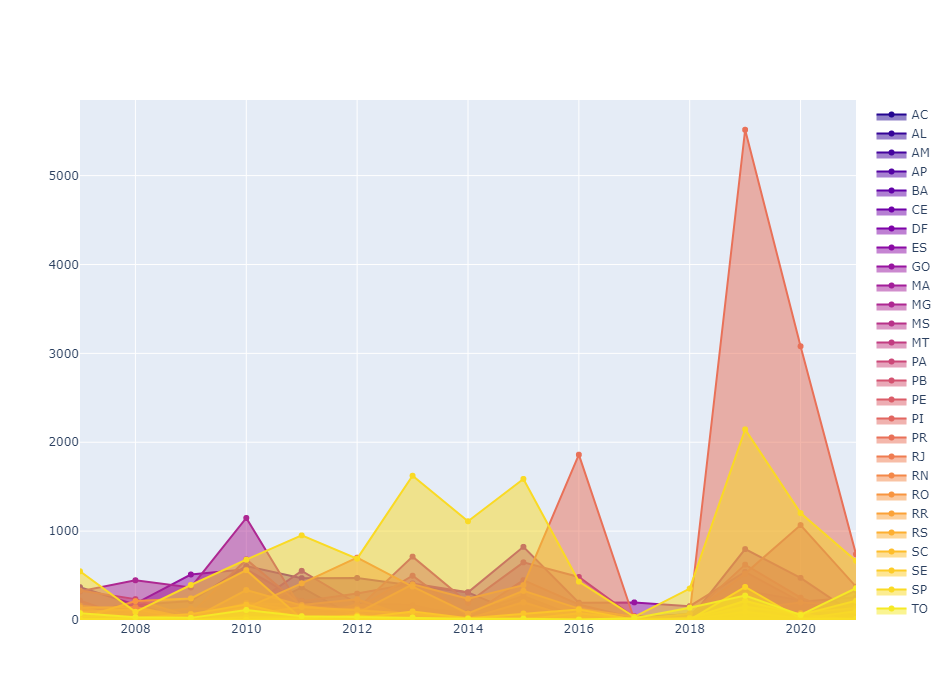

In [19]:
fig = go.Figure()
for d,p in zip(states, pal):
    fig.add_trace(go.Scatter(x = df_res[df_res['STATE']==d]['YEAR'],
                             y = df_res[df_res['STATE']==d]['TESTS'],
                             name = d,
                             line_color = p, 
                             fill='tozeroy'))   #tozeroy 
    fig.update_layout(width = 900, height = 700)

fig.show()

### Average and Standard Deviation of tests, maximum and minimum

In [20]:
df_res_tests = df_res.copy()
df_res_tests = df_res_tests.drop(columns = ['CASES','RATIO'])
df_res_tests = df_res_tests.pivot(index='YEAR', columns='STATE').droplevel(0, axis=1)

In [21]:
df_stats_tests = pd.DataFrame()
df_stats_tests['MEAN'] = df_res_tests.mean(axis = 0)
df_stats_tests['STD'] = df_res_tests.std(axis = 0)
df_stats_tests['STD/MEAN'] = df_res_tests.std(axis = 0)/df_res_tests.mean(axis = 0)
df_stats_tests['MAX'] = df_res_tests.max(axis = 0)
df_stats_tests['MIN'] = df_res_tests.min(axis = 0)

In [22]:
df_stats_tests.sort_values(['STD/MEAN'],ascending = [True])

,MEAN,STD,STD/MEAN,MAX,MIN
STATE,,,,,
GO,330.933333,200.842321,0.606897,823,93
MT,92.533333,64.471330,0.696736,197,2
SP,834.200000,601.336749,0.720854,2145,36
PB,36.533333,29.693353,0.812774,97,0
BA,229.533333,191.865975,0.835896,607,25
MG,369.733333,315.228141,0.852582,1148,23
PE,73.866667,69.522727,0.941192,199,9
CE,125.533333,118.395141,0.943137,369,7
RN,48.533333,47.771580,0.984305,147,2


## Percentage of tests for serotype
That is, percentage of positive cases that were tested for serotype 1,2,3 or 4. That is, **cases tested/total cases**.

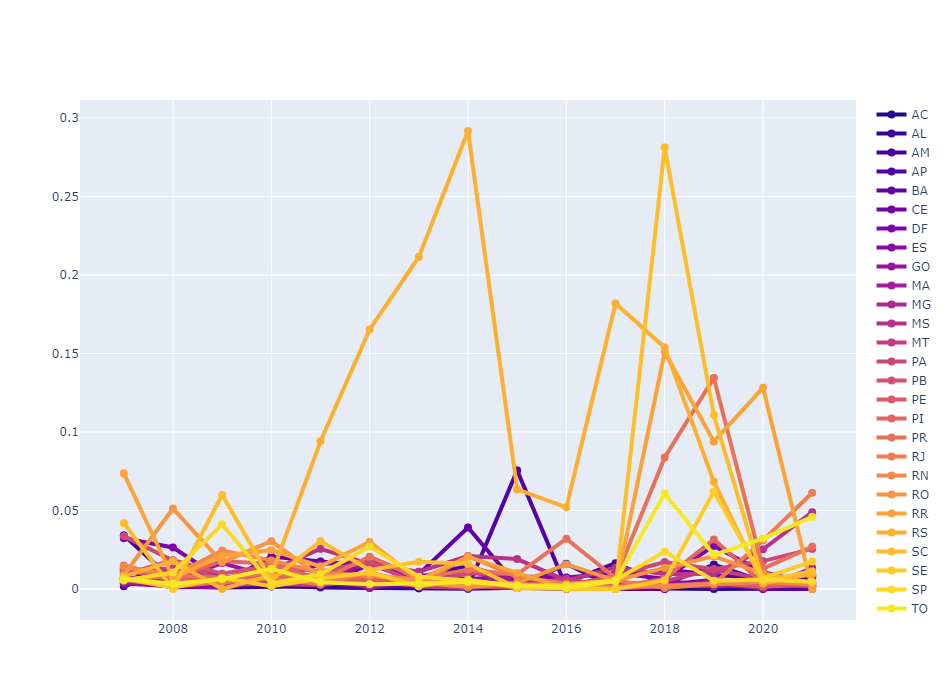

In [23]:
#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='plasma', n_colors=len(states)).as_hex())

fig = go.Figure()
for d,p in zip(states, pal):
    fig.add_trace(go.Scatter(x = df_res[df_res['STATE']==d]['YEAR'],
                             y = df_res[df_res['STATE']==d]['RATIO'],
                             name = d,
                             line_color = p, 
                             line_width = 4,
                             marker_size = 8,
                             fill=None))   #tozeroy 
    fig.update_layout(width = 900, height = 700)

fig.show()

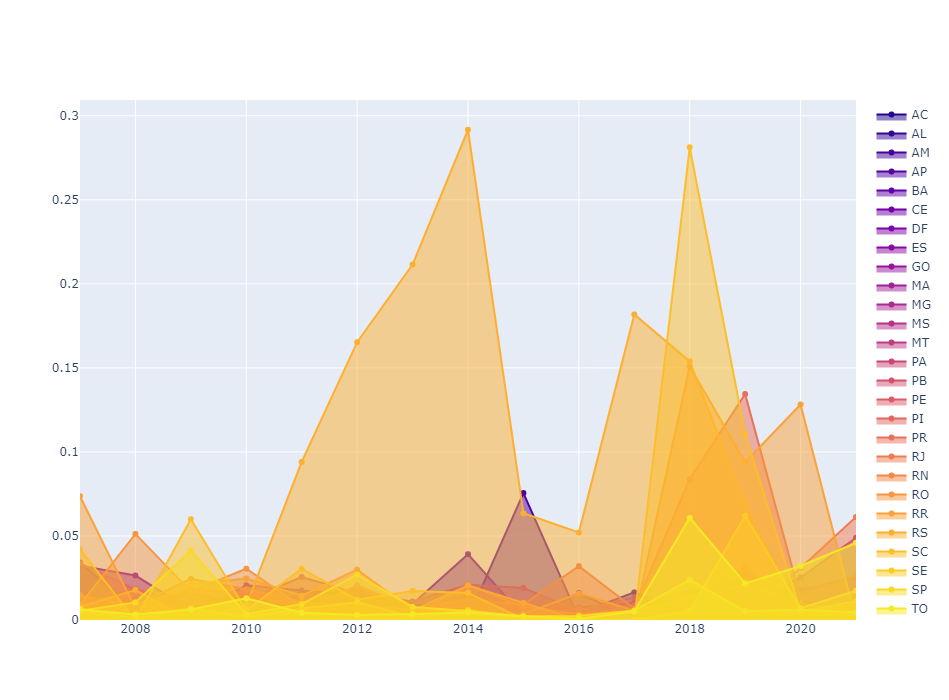

In [24]:
fig = go.Figure()
for d,p in zip(states, pal):
    fig.add_trace(go.Scatter(x = df_res[df_res['STATE']==d]['YEAR'],
                             y = df_res[df_res['STATE']==d]['RATIO'],
                             name = d,
                             line_color = p, 
                             fill='tozeroy'))   #tozeroy 
    fig.update_layout(width = 900, height = 700)

fig.show()

### Average and Standard Deviation of Ratio of tests and cases, maximum and minimum

In [25]:
df_res_ratio = df_res.copy()
df_res_ratio = df_res_ratio.drop(columns = ['TESTS','CASES'])
df_res_ratio = df_res_ratio.pivot(index='YEAR', columns='STATE').droplevel(0, axis=1)

In [26]:
df_stats_ratio = pd.DataFrame()
df_stats_ratio['MEAN'] = df_res_ratio.mean(axis = 0)
df_stats_ratio['STD'] = df_res_ratio.std(axis = 0)
df_stats_ratio['STD/MEAN'] = df_res_ratio.std(axis = 0)/df_res_ratio.mean(axis = 0)
df_stats_ratio['MAX'] = df_res_ratio.max(axis = 0)
df_stats_ratio['MIN'] = df_res_ratio.min(axis = 0)

In [27]:
df_stats_ratio.sort_values(['STD/MEAN'],ascending = [True])

,MEAN,STD,STD/MEAN,MAX,MIN
STATE,,,,,
PA,0.013784,0.008429,0.611478,0.033693,0.001789
GO,0.006714,0.004269,0.635883,0.016538,0.002169
PE,0.004445,0.002970,0.668100,0.012502,0.000238
MS,0.015944,0.011425,0.716541,0.048898,0.003086
MT,0.005518,0.004114,0.745456,0.013129,0.000637
MG,0.004534,0.003498,0.771536,0.012905,0.001135
CE,0.004072,0.003261,0.800760,0.012117,0.000257
DF,0.011684,0.009461,0.809731,0.032349,0.002210
MA,0.005027,0.004236,0.842570,0.013369,0.000515


## Percentage of tests for serotype (nromalized)

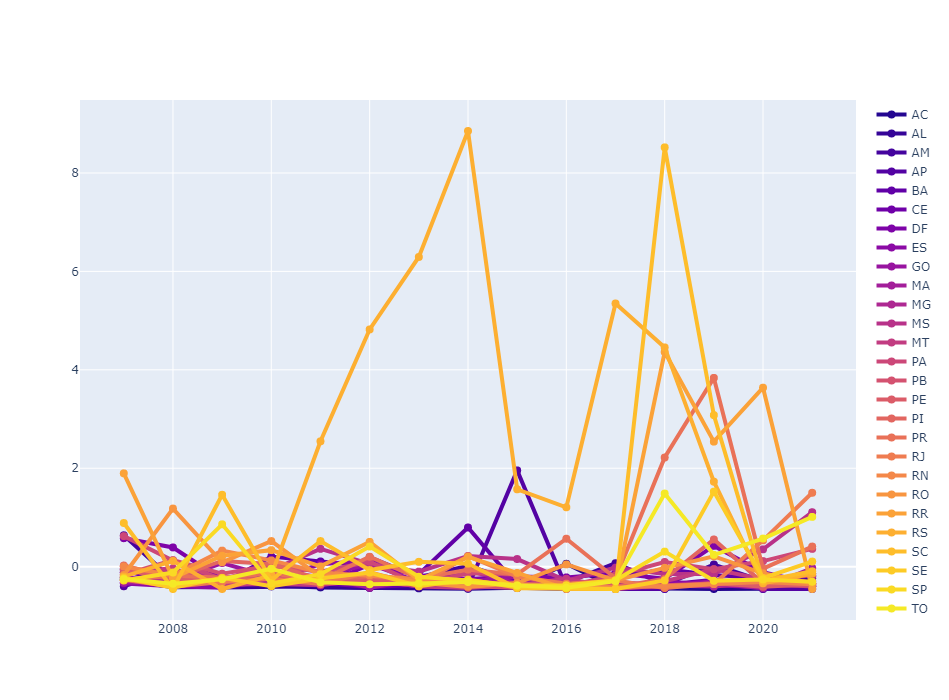

In [29]:
#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='plasma', n_colors=len(states)).as_hex())

fig = go.Figure()
for d,p in zip(states, pal):
    fig.add_trace(go.Scatter(x = df_res[df_res['STATE']==d]['YEAR'],
                             y = (df_res[df_res['STATE']==d]['RATIO'] - df_res['RATIO'].mean())/(df_res['RATIO'].std()),
                             name = d,
                             line_color = p, 
                             line_width = 4,
                             marker_size = 8,
                             fill=None))   #tozeroy 
    fig.update_layout(width = 900, height = 700)

fig.show()